In [72]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [73]:
df = pd.read_csv(r"C:\Users\alekh\Downloads\diabetic_data.csv.zip")

In [74]:
df.head(10).T

,0,1,2,3,4,5,6,7,8,9
encounter_id,2278392,149190,64410,500364,16680,35754,55842,63768,12522,15738
patient_nbr,8222157,55629189,86047875,82442376,42519267,82637451,84259809,114882984,48330783,63555939
race,Caucasian,Caucasian,AfricanAmerican,Caucasian,Caucasian,Caucasian,Caucasian,Caucasian,Caucasian,Caucasian
gender,Female,Female,Female,Male,Male,Male,Male,Male,Female,Female
age,[0-10),[10-20),[20-30),[30-40),[40-50),[50-60),[60-70),[70-80),[80-90),[90-100)
weight,?,?,?,?,?,?,?,?,?,?
admission_type_id,6,1,1,1,1,2,3,1,2,3
discharge_disposition_id,25,1,1,1,1,1,1,1,1,3
admission_source_id,1,7,7,7,7,2,2,7,4,4
time_in_hospital,1,3,2,2,1,3,4,5,13,12


In [75]:
df.columns

Index(['encounter_id', 'patient_nbr', 'race', 'gender', 'age', 'weight',
       'admission_type_id', 'discharge_disposition_id', 'admission_source_id',
       'time_in_hospital', 'payer_code', 'medical_specialty',
       'num_lab_procedures', 'num_procedures', 'num_medications',
       'number_outpatient', 'number_emergency', 'number_inpatient', 'diag_1',
       'diag_2', 'diag_3', 'number_diagnoses', 'max_glu_serum', 'A1Cresult',
       'metformin', 'repaglinide', 'nateglinide', 'chlorpropamide',
       'glimepiride', 'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide',
       'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone',
       'tolazamide', 'examide', 'citoglipton', 'insulin',
       'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone', 'change', 'diabetesMed', 'readmitted'],
      dtype='object')

In [76]:
df.shape

(101766, 50)

In [77]:
df.dtypes

encounter_id                 int64
patient_nbr                  int64
race                        object
gender                      object
age                         object
weight                      object
admission_type_id            int64
discharge_disposition_id     int64
admission_source_id          int64
time_in_hospital             int64
payer_code                  object
medical_specialty           object
num_lab_procedures           int64
num_procedures               int64
num_medications              int64
number_outpatient            int64
number_emergency             int64
number_inpatient             int64
diag_1                      object
diag_2                      object
diag_3                      object
number_diagnoses             int64
max_glu_serum               object
A1Cresult                   object
metformin                   object
repaglinide                 object
nateglinide                 object
chlorpropamide              object
glimepiride         

In [78]:
for col in df.columns:#missing values
    if df[col].dtype ==object:
        print(col,df[col][df[col]=='?'].count())

race 2273
gender 0
age 0
weight 98569
payer_code 40256
medical_specialty 49949
diag_1 21
diag_2 358
diag_3 1423
max_glu_serum 0
A1Cresult 0
metformin 0
repaglinide 0
nateglinide 0
chlorpropamide 0
glimepiride 0
acetohexamide 0
glipizide 0
glyburide 0
tolbutamide 0
pioglitazone 0
rosiglitazone 0
acarbose 0
miglitol 0
troglitazone 0
tolazamide 0
examide 0
citoglipton 0
insulin 0
glyburide-metformin 0
glipizide-metformin 0
glimepiride-pioglitazone 0
metformin-rosiglitazone 0
metformin-pioglitazone 0
change 0
diabetesMed 0
readmitted 0


In [79]:
#missing values
print('gender',df['gender'][df['gender']=='unknow/Invalid'].count())

gender 0


In [80]:
#dropping columns with large number of missing values
df=df.drop(['weight','payer_code','medical_specialty'],axis = 1)

In [81]:
drop_Idx = set(df[(df['diag_1']=='?')&(df['diag_2']=='?')&(df['diag_3']=='?')].index)
drop_Idx = drop_Idx.union(set(df['diag_1'][df['diag_1']=='?'].index))
drop_Idx = drop_Idx.union(set(df['diag_2'][df['diag_2']=='?'].index))
drop_Idx = drop_Idx.union(set(df['diag_3'][df['diag_3']=='?'].index))
drop_Idx = drop_Idx.union(set(df['race'][df['race']=='?'].index))
drop_Idx = drop_Idx.union(set(df[df['discharge_disposition_id']==11].index))
drop_Idx = drop_Idx.union(set(df['gender'][df['gender']=='unknow/Invalid'].index))
new_Idx = list(set(df.index)-set(drop_Idx))
df=df.iloc[new_Idx]

In [82]:
df=df.drop(['citoglipton','examide'],axis=1)

In [83]:
for col in df.columns:
    if df[col].dtype == object:
        print(col,df[col][df[col]=='?'].count())
print('gender', df['gender'][df['gender']=='unknown/Invalid'].count())        


race 0
gender 0
age 0
diag_1 0
diag_2 0
diag_3 0
max_glu_serum 0
A1Cresult 0
metformin 0
repaglinide 0
nateglinide 0
chlorpropamide 0
glimepiride 0
acetohexamide 0
glipizide 0
glyburide 0
tolbutamide 0
pioglitazone 0
rosiglitazone 0
acarbose 0
miglitol 0
troglitazone 0
tolazamide 0
insulin 0
glyburide-metformin 0
glipizide-metformin 0
glimepiride-pioglitazone 0
metformin-rosiglitazone 0
metformin-pioglitazone 0
change 0
diabetesMed 0
readmitted 0
gender 0


In [84]:
df['service_utilization']=df['number_outpatient'] + df['number_emergency']+df['number_inpatient']

In [85]:
keys = ['metformin','repaglinide','nateglinide','chlorpropamide','glimepiride', 'glipizide','glyburide','pioglitazone']
for col in keys:
    colname = str(col) + 'temp'
    df[colname]=df[col].apply(lambda x: 0 if(x =='No' or x =='Steady')else 1)
df['numchange']= 0
for col in keys:
    colname = str(col)+'temp'
    df['numchange']=df['numchange']+df[colname]
    del df[colname]
df['numchange'].value_counts()


numchange
0    91560
1     4583
2      300
3        3
4        1
Name: count, dtype: int64

In [86]:
df['admission_type_id']=df['admission_type_id'].replace(2,1)
df['admission_type_id']=df['admission_type_id'].replace(7,1)
df['admission_type_id']=df['admission_type_id'].replace(6,5)
df['admission_type_id']=df['admission_type_id'].replace(8,5)
  
df['discharge_disposition_id'] = df['discharge_disposition_id'].replace(6,1)  
df['discharge_disposition_id'] = df['discharge_disposition_id'].replace(8,1)  
df['discharge_disposition_id'] = df['discharge_disposition_id'].replace(9,1)  
df['discharge_disposition_id'] = df['discharge_disposition_id'].replace(13,1)  
df['discharge_disposition_id'] = df['discharge_disposition_id'].replace(3,2)  
df['discharge_disposition_id'] = df['discharge_disposition_id'].replace(4,2)  
df['discharge_disposition_id'] = df['discharge_disposition_id'].replace(5,2)  
df['discharge_disposition_id'] = df['discharge_disposition_id'].replace(14,2)  
df['discharge_disposition_id'] = df['discharge_disposition_id'].replace(22,2)  
df['discharge_disposition_id'] = df['discharge_disposition_id'].replace(23,2)  
df['discharge_disposition_id'] = df['discharge_disposition_id'].replace(24,2)  
df['discharge_disposition_id'] = df['discharge_disposition_id'].replace(12,10)  
df['discharge_disposition_id'] = df['discharge_disposition_id'].replace(15,10)  
df['discharge_disposition_id'] = df['discharge_disposition_id'].replace(16,10)  
df['discharge_disposition_id'] = df['discharge_disposition_id'].replace(17,10)  
df['discharge_disposition_id'] = df['discharge_disposition_id'].replace(25,18)  
df['discharge_disposition_id'] = df['discharge_disposition_id'].replace(26,18)

df['admission_source_id']=df['admission_source_id'].replace(2,1)
df['admission_source_id']=df['admission_source_id'].replace(3,1)
df['admission_source_id']=df['admission_source_id'].replace(5,4)
df['admission_source_id']=df['admission_source_id'].replace(6,4)
df['admission_source_id']=df['admission_source_id'].replace(10,4)
df['admission_source_id']=df['admission_source_id'].replace(22,4)
df['admission_source_id']=df['admission_source_id'].replace(15,9)
df['admission_source_id']=df['admission_source_id'].replace(17,9)
df['admission_source_id']=df['admission_source_id'].replace(20,9)
df['admission_source_id']=df['admission_source_id'].replace(21,9)
df['admission_source_id']=df['admission_source_id'].replace(13,11)
df['admission_source_id']=df['admission_source_id'].replace(14,11)

In [89]:
df['A1Cresult']=df['A1Cresult'].replace('>7',1)
df['A1Cresult']=df['A1Cresult'].replace('>8',1)
df['A1Cresult']=df['A1Cresult'].replace('Norm',0)
df['A1Cresult']=df['A1Cresult'].replace('None',-99)
df['max_glu_serum']=df['max_glu_serum'].replace('>200',1)
df['max_glu_serum']=df['max_glu_serum'].replace('>300',1)
df['max_glu_serum']=df['max_glu_serum'].replace('Norm',0)
df['max_glu_serum']=df['max_glu_serum'].replace('None',-99)

In [91]:
for i in range (0,10):
    df['age']=df['age'].replace('['+str(10*i)+'-'+str(10*(i+1))+')',i+1)
df['age'].value_counts()

age
8     24816
7     21521
6     16546
9     16223
5      9208
4      3538
10     2594
3      1471
2       466
1        64
Name: count, dtype: int64

In [92]:
df2 = df.drop_duplicates(subset=['patient_nbr'],keep='first')
df2.shape
(70442,55)

(70442, 55)

In [93]:
df.head().T

,1,2,3,4,5
encounter_id,149190,64410,500364,16680,35754
patient_nbr,55629189,86047875,82442376,42519267,82637451
race,Caucasian,AfricanAmerican,Caucasian,Caucasian,Caucasian
gender,Female,Female,Male,Male,Male
age,2,3,4,5,6
admission_type_id,1,1,1,1,1
discharge_disposition_id,1,1,1,1,1
admission_source_id,7,7,7,7,1
time_in_hospital,3,2,2,1,3
num_lab_procedures,59,11,44,51,31


In [94]:
df['readmitted'].value_counts()

readmitted
NO     50732
>30    34649
<30    11066
Name: count, dtype: int64

In [95]:
df['readmitted']=df['readmitted'].replace('>30',0)
df['readmitted']=df['readmitted'].replace('<30',0)
df['readmitted']=df['readmitted'].replace('No',0)


In [96]:
df['level1_diag1']=df['diag_1']
df['level1_diag1']=df['diag_1']
df['level1_diag2']=df['diag_2']
df['level1_diag2']=df['diag_2']
df['level1_diag3']=df['diag_3']
df['level1_diag3']=df['diag_3']

In [97]:
df.loc[df['diag_1'].str.contains("v"),['level1_diag1','level2_diag1']]=0
df.loc[df['diag_1'].str.contains("v"),['level1_diag1','level2_diag1']]=0
df.loc[df['diag_2'].str.contains("v"),['level1_diag1','level2_diag2']]=0
df.loc[df['diag_2'].str.contains("v"),['level1_diag1','level2_diag2']]=0
df.loc[df['diag_3'].str.contains("v"),['level1_diag1','level2_diag3']]=0
df.loc[df['diag_3'].str.contains("v"),['level1_diag1','level2_diag3']]=0
df['level1_diag1']=df['level1_diag1'].replace('?',-1)
df['level2_diag1']=df['level2_diag2'].replace('?',-1)
df['level1_diag2']=df['level1_diag1'].replace('?',-1)
df['level2_diag2']=df['level2_diag2'].replace('?',-1)
df['level1_diag3']=df['level1_diag1'].replace('?',-1)
df['level2_diag3']=df['level2_diag2'].replace('?',-1)


In [98]:
print("Available columns:", df.columns.tolist())

Available columns: ['encounter_id', 'patient_nbr', 'race', 'gender', 'age', 'admission_type_id', 'discharge_disposition_id', 'admission_source_id', 'time_in_hospital', 'num_lab_procedures', 'num_procedures', 'num_medications', 'number_outpatient', 'number_emergency', 'number_inpatient', 'diag_1', 'diag_2', 'diag_3', 'number_diagnoses', 'max_glu_serum', 'A1Cresult', 'metformin', 'repaglinide', 'nateglinide', 'chlorpropamide', 'glimepiride', 'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide', 'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone', 'tolazamide', 'insulin', 'glyburide-metformin', 'glipizide-metformin', 'glimepiride-pioglitazone', 'metformin-rosiglitazone', 'metformin-pioglitazone', 'change', 'diabetesMed', 'readmitted', 'service_utilization', 'numchange', 'level1_diag1', 'level1_diag2', 'level1_diag3', 'level2_diag1', 'level2_diag2', 'level2_diag3']


In [141]:
df['level1_diag1'] = pd.to_numeric(df['level1_diag1'], errors='coerce')
df['level1_diag2'] = pd.to_numeric(df['level1_diag2'], errors='coerce')
df['level1_diag3'] = pd.to_numeric(df['level1_diag3'], errors='coerce')


In [147]:
for index,row in df.iterrows():
    if(row['level1_diag1'] >=390) & (row['level1_diag1'] < 460):
       df.loc[index,'level_diag1']=1
    elif(row['level1_diag1'] >= 460) & (row['level1_diag1'] < 520):
        df.loc[index,'level_diag1']=2
    elif(row['level1_diag1'] >= 520) & (row['level1_diag1'] < 580):
        df.loc[index,'level_diag1']=3
    elif (np.floor(row['level1_diag1']) == 250):
        df.loc[index,'level_diag1']=4
    elif(row['level1_diag1'] >= 800) & (row['level1_diag1'] < 1000):
        df.loc[index,'level_diag1']=5
    elif(row['level1_diag1'] >= 710) & (row['level1_diag1'] < 740):
         df.loc[index,'level1_diag1']=6
    elif(row['level1_diag1'] >= 580) & (row['level1_diag1'] < 630): 
         df.loc[index,'level1_diag1']=7
    elif(row['level1_diag1'] >= 140) & (row['level1_diag1'] < 240):
        df.loc[index,'level1_diag1']=8
    else:
        df.loc[index,'level1_diag1']=0


for index,row in df.iterrows():
    if(row['level1_diag2'] >= 390) &( row['level1_diag2'] < 460) :
       df.loc[index,'level_diag2']=1
    elif(row['level1_diag2'] >= 460) & (row['level1_diag2'] < 520):
       df.loc[index,'level_diag2']=2
    elif(row['level1_diag1'] >= 520) & (df['level1_diag2'] < 580) :
       df.loc[index,'level_diag2']=3
    elif (np.floor(df['level1_diag2']) == 250):
      df.loc[index,'level_diag2']=4
    elif(row['level1_diag2'] >= 800) & (df['level1_diag2'] < 1000):
      df.loc[index,'level_diag2']=5
    elif(row['level1_diag2'] >= 710) & (row['level1_diag2'] < 740):
      df.loc[index,'level1_diag2']=6
    elif(row['level1_diag2'] >= 580) & (row['level1_diag2'] < 630) :
      df.loc[index,'level1_diag2']=7
    elif(row['level1_diag2'] >= 140) & (row['level1_diag2'] < 240):
      df.loc[index,'level1_diag2']=8
    else:
       df.loc[index,'level1_diag2']=0

for index,row in df.iterrows():
    if(row['level1_diag3'] >= 390 & row['level1_diag3'] < 460) :
     df.loc[index,'level_diag3']=1
    elif(row['level1_diag3'] >= 460) & (row['level1_diag3'] < 520) :
     df.loc[index,'level_diag3']=2
    elif(row['level1_diag1'] >= 520) & (df['level1_diag3'] < 580) :
     df.loc[index,'level_diag3']=3
    elif (np.floor(df['level1_diag3']) == 250):
     df.loc[index,'level_diag3']=4
    elif(row['level1_diag3'] >= 800) & (df['level1_diag3'] < 1000):
     df.loc[index,'level_diag3']=5
    elif(row['level1_diag3'] >= 710) & (row['level1_diag3'] < 740):
     df.loc[index,'level1_diag3']=6
    elif(row['level1_diag3'] >= 580) & (row['level1_diag3'] < 630) :
     df.loc[index,'level1_diag3']=7
    elif(row['level1_diag3'] >= 140) & (row['level1_diag3'] < 240):
     df.loc[index,'level1_diag3']=8
    else:
       df.loc[index,'level1_diag3']=0

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

Text(0.5, 1.0, 'Distribution of readmission')

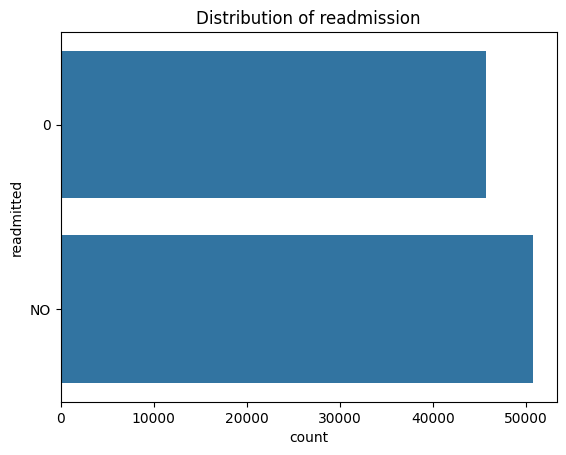

In [100]:
sns.countplot(df['readmitted']).set_title('Distribution of readmission')

C:\Users\alekh\AppData\Local\Temp\ipykernel_16888\3003135082.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  ax=sns.kdeplot(df.loc[(df['readmitted']==0),'time_in_hospital'],color='b',shade=True,label='Not Redmitted')
C:\Users\alekh\AppData\Local\Temp\ipykernel_16888\3003135082.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  ax=sns.kdeplot(df.loc[(df['readmitted']==1),'time_in_hospital'],color='b',shade=True,label='Redmitted')


Text(0.5, 1.0, 'Time in Hospital VS.Readmission')

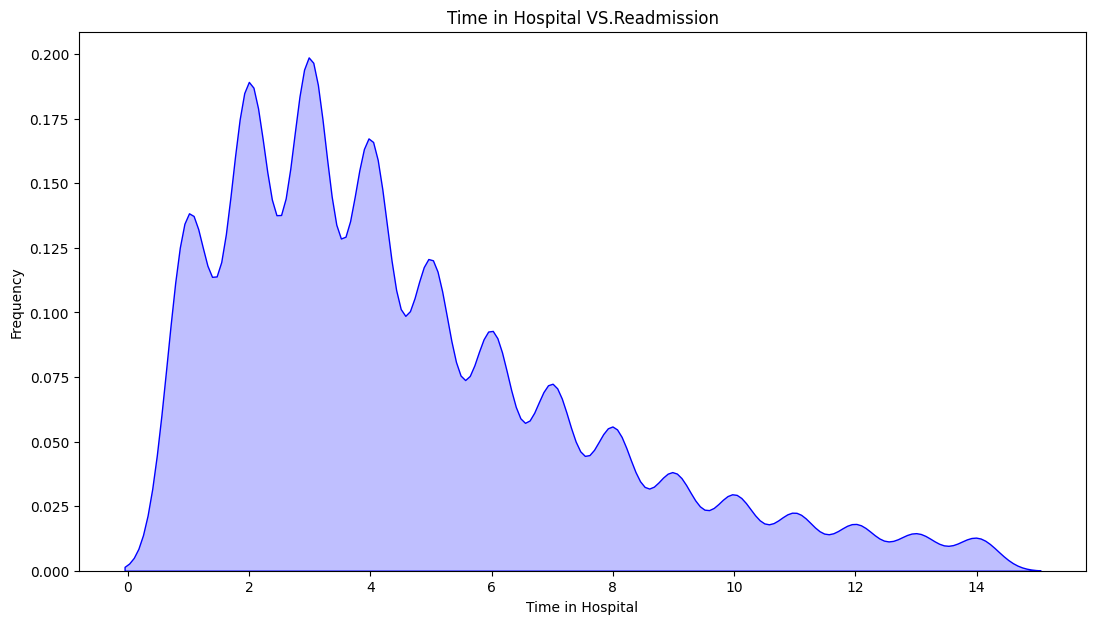

In [101]:
fig = plt.figure(figsize=(13,7),)
ax=sns.kdeplot(df.loc[(df['readmitted']==0),'time_in_hospital'],color='b',shade=True,label='Not Redmitted')
ax=sns.kdeplot(df.loc[(df['readmitted']==1),'time_in_hospital'],color='b',shade=True,label='Redmitted')
ax.set(xlabel='Time in Hospital',ylabel='Frequency')                 
plt.title('Time in Hospital VS.Readmission')                     

Text(0.5, 1.0, 'Age of Patient VS. Readmission')

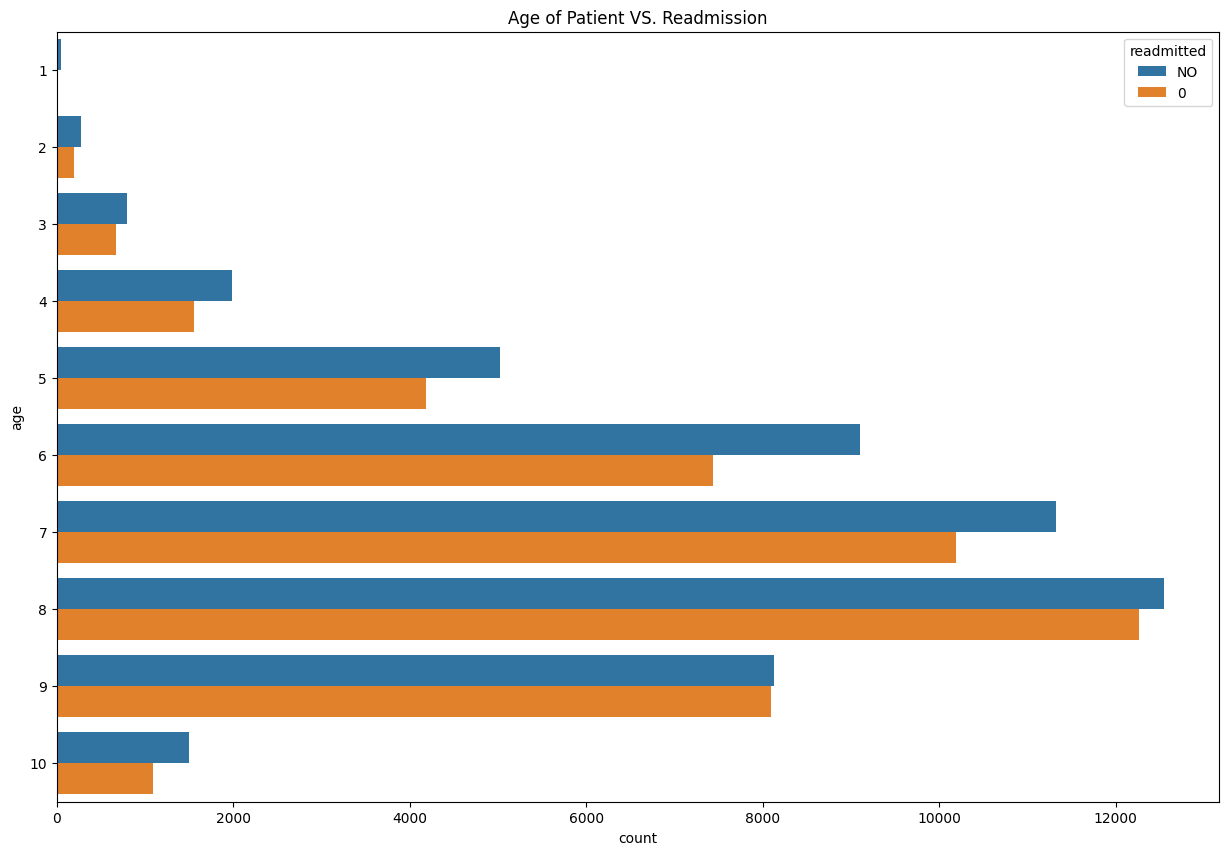

In [102]:
fig = plt.figure(figsize=(15,10))
sns.countplot(y=df['age'],hue = df['readmitted']).set_title('Age of Patient VS. Readmission')

<Axes: xlabel='count', ylabel='race'>

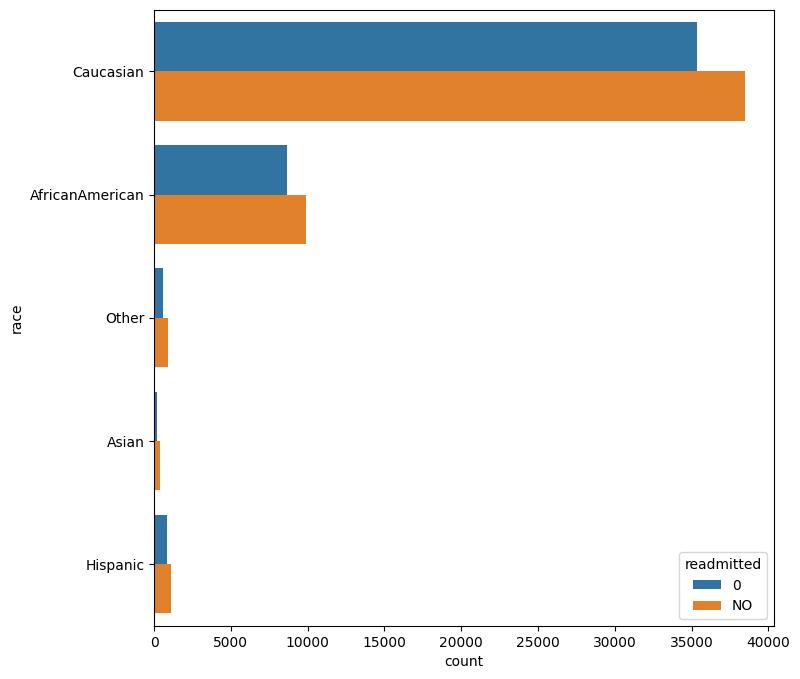

In [103]:
fig = plt.figure(figsize=(8,8))
sns.countplot(y =df['race'],hue =df['readmitted'])

Text(0.5, 1.0, 'Number of medication used VS. Readmission')

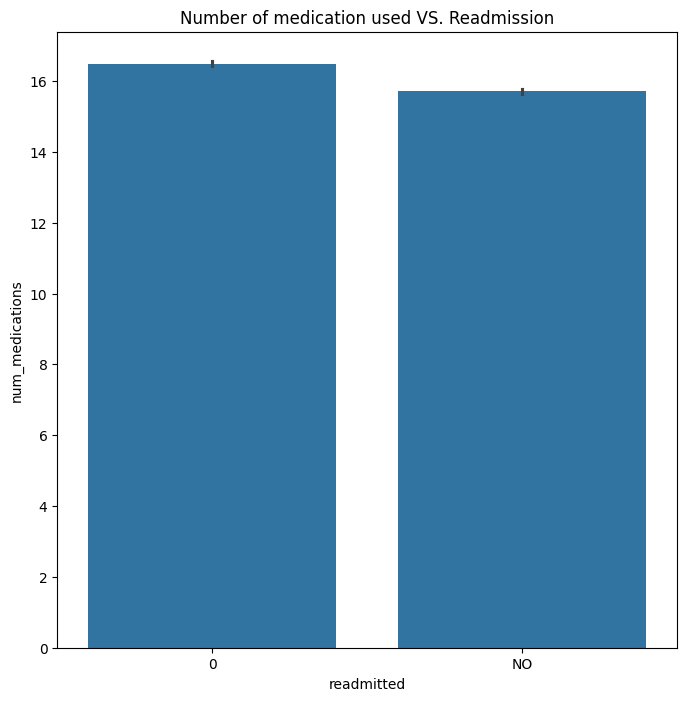

In [104]:
fig =plt.figure(figsize=(8,8))
sns.barplot(x=df['readmitted'],y=df['num_medications']).set_title("Number of medication used VS. Readmission")

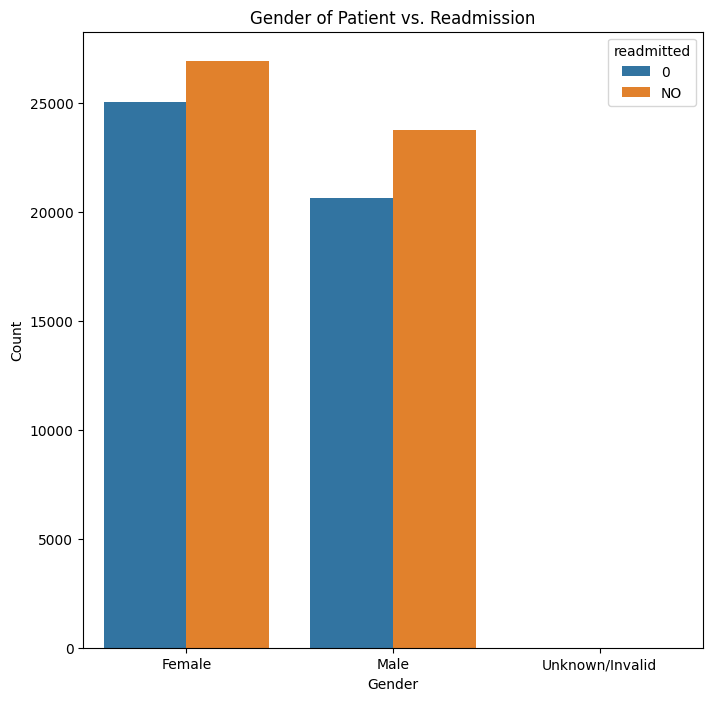

In [105]:
plt.figure(figsize=(8, 8))
sns.countplot(data=df, x='gender', hue='readmitted')
plt.title("Gender of Patient vs. Readmission")
plt.xlabel("Gender")
plt.ylabel("Count")
plt.show()

In [31]:
#fig =plt.figure(figsize=(8,8))
#sns.countplot(df['gender'], hue = df['readmitted']).set_title("Gender of Patient VS. Readmission")

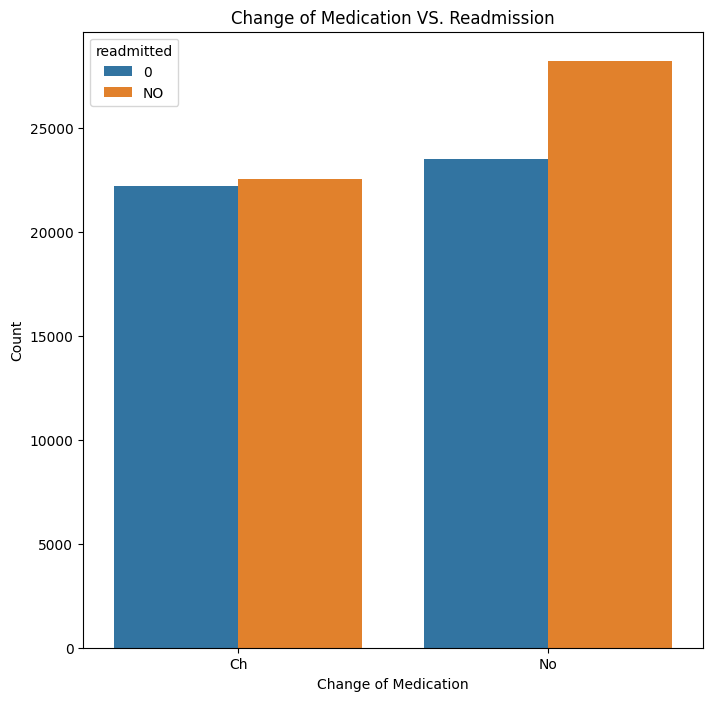

In [106]:
plt.figure(figsize=(8, 8))
sns.countplot(data=df, x='change', hue='readmitted')
plt.title('Change of Medication VS. Readmission')
plt.xlabel('Change of Medication')
plt.ylabel('Count')
plt.show()

In [33]:
#fig =plt.figure(figsize=(8,8))
#sns.countplot(df['change'], hue = df['readmitted']).set_title('Change of Medication VS. Readmission')

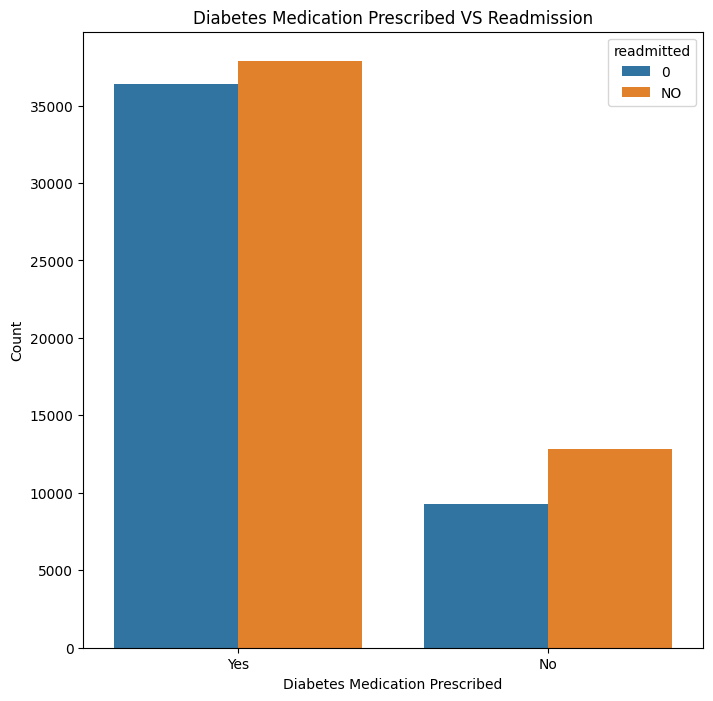

In [107]:
plt.figure(figsize=(8, 8))
sns.countplot(data=df, x='diabetesMed', hue='readmitted')
plt.title('Diabetes Medication Prescribed VS Readmission')
plt.xlabel('Diabetes Medication Prescribed')
plt.ylabel('Count')
plt.show()

In [45]:
#fig = plt.figure(figsize=(8,8))
#sns.countplot(df['diabetesMed'],hue=df['readmitted']).set_title('Diabets Medication Prescribed VS Readmission')

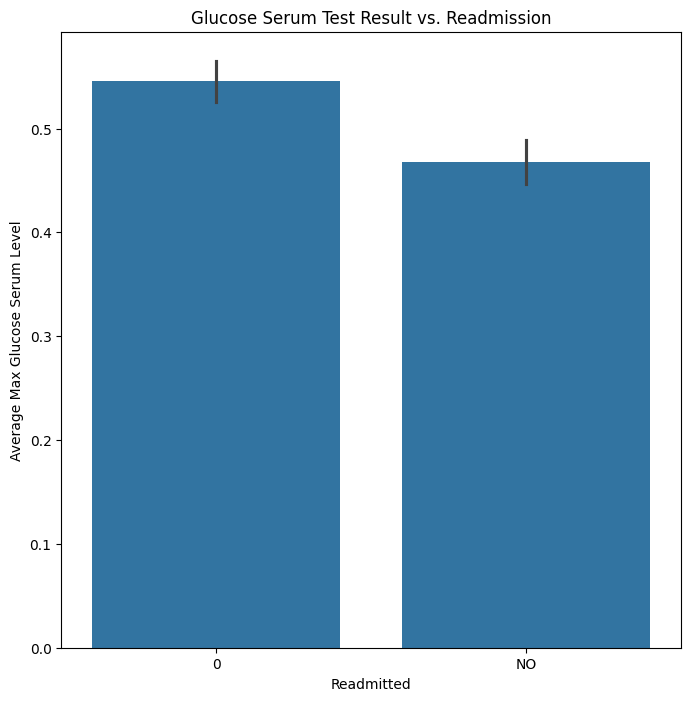

In [108]:
plt.figure(figsize=(8, 8))
sns.barplot(data=df, x='readmitted', y='max_glu_serum')
plt.title('Glucose Serum Test Result vs. Readmission')
plt.xlabel('Readmitted')
plt.ylabel('Average Max Glucose Serum Level')
plt.show()

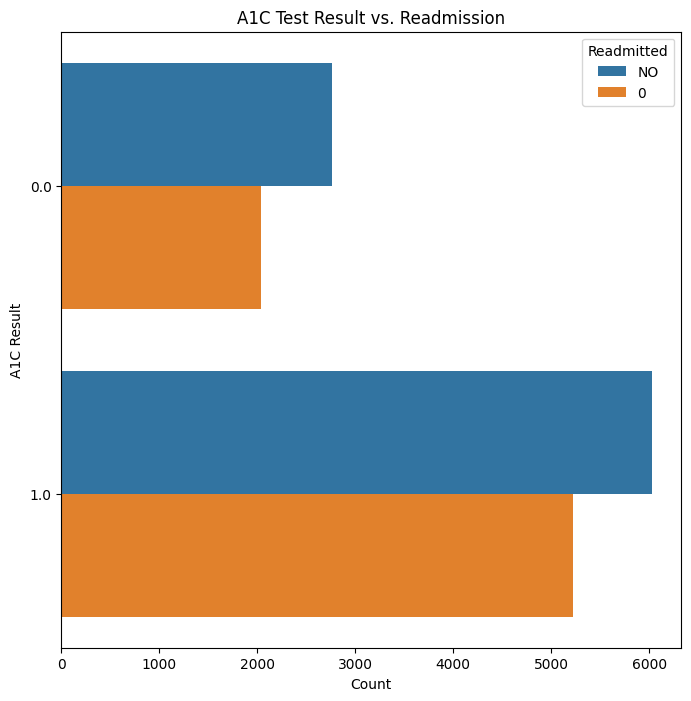

In [109]:
plt.figure(figsize=(8, 8))
sns.countplot(data=df, y='A1Cresult', hue='readmitted')
plt.title('A1C Test Result vs. Readmission')
plt.xlabel('Count')
plt.ylabel('A1C Result')
plt.legend(title='Readmitted')
plt.show()


Text(0.5, 1.0, 'A1C test result VS readmitted')

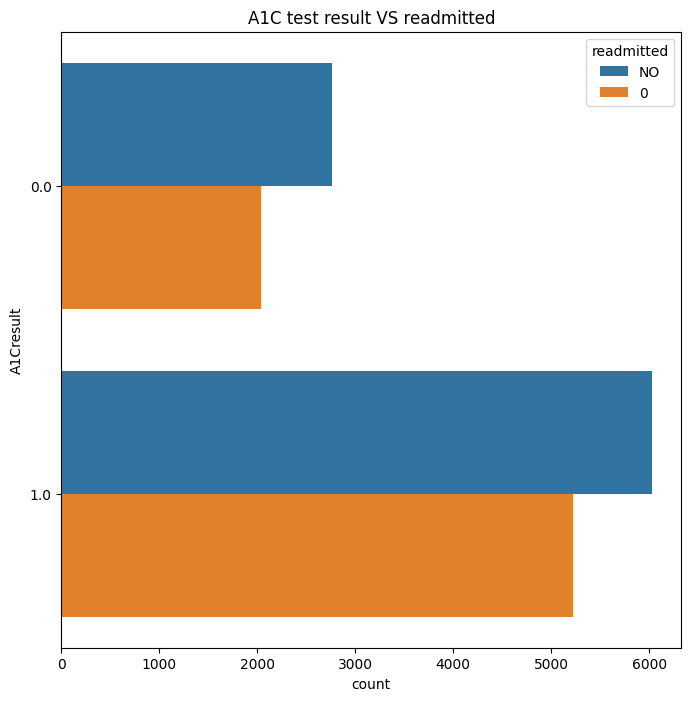

In [110]:
fig = plt.figure(figsize=(8,8))
sns.countplot(y=df['A1Cresult'], hue=df['readmitted']).set_title("A1C test result VS readmitted")

Text(0.5, 1.0, 'Number of lab procedure VS. Readmission')

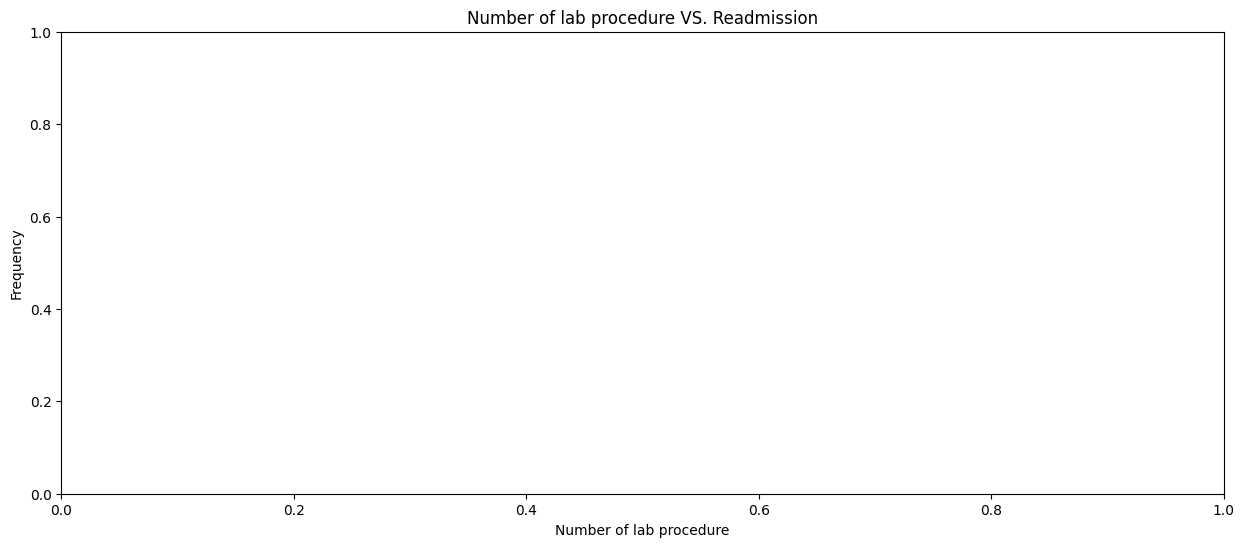

In [148]:
fig = plt.figure(figsize=(15,6))
ax=sns.kdeplot(df.loc[(df['readmitted']==1),'num_lab_procedures'],color='b',shape=True,label='Not readmitted')
ax=sns.kdeplot(df.loc[(df['readmitted']==2),'num_lab_procedures'],color='r',shape=True,label='Not readmitted')
ax.set(xlabel='Number of lab procedure',ylabel='Frequency')
plt.title('Number of lab procedure VS. Readmission')

In [53]:
df['age'] =df['age'].astype('int64')
print(df.age.value_counts())
age_dict ={1:5, 2:15, 3:25, 4:35, 5:45, 6:55, 7:65, 8:75, 9:85, 10:95 }
df['age']=df.age.map(age_dict)
print(df.age.value_counts())

age
8     24816
7     21521
6     16546
9     16223
5      9208
4      3538
10     2594
3      1471
2       466
1        64
Name: count, dtype: int64
age
75    24816
65    21521
55    16546
85    16223
45     9208
35     3538
95     2594
25     1471
15      466
5        64
Name: count, dtype: int64


In [114]:
num_col = list(set(list(df._get_numeric_data().columns))-{'readmitted'})

In [115]:
df.shape

(96447, 53)

In [116]:
dfcopy = df.copy(deep = True)

In [117]:
df ['readmitted']=df['readmitted'].apply(lambda x:0 if x==2 else x)

In [151]:
df.columns


Index(['encounter_id', 'patient_nbr', 'race', 'gender', 'age',
       'admission_type_id', 'discharge_disposition_id', 'admission_source_id',
       'time_in_hospital', 'num_lab_procedures', 'num_procedures',
       'num_medications', 'number_outpatient', 'number_emergency',
       'number_inpatient', 'diag_1', 'diag_2', 'diag_3', 'number_diagnoses',
       'max_glu_serum', 'A1Cresult', 'metformin', 'repaglinide', 'nateglinide',
       'chlorpropamide', 'glimepiride', 'acetohexamide', 'glipizide',
       'glyburide', 'tolbutamide', 'pioglitazone', 'rosiglitazone', 'acarbose',
       'miglitol', 'troglitazone', 'tolazamide', 'insulin',
       'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone', 'change', 'diabetesMed', 'readmitted',
       'service_utilization', 'numchange', 'level1_diag1', 'level1_diag2',
       'level1_diag3', 'level2_diag1', 'level2_diag2', 'level2_diag3',
       'level_diag1'],
 

In [149]:
feature_names = X_train.time_in_hospital
feature_imports = dtree.feature_importances_

most_imp_features = pd.DataFrame(
    [(f, imp) for f, imp in zip(feature_names, feature_imports)],
    columns=["Feature", "Importance"]).nlargest(10, "Importance")

most_imp_features.sort_values(by="Importance", inplace=True)

print(most_imp_features)

plt.figure(figsize=(10, 6))
plt.barh(range(len(most_imp_features)), most_imp_features.Importance, align='center', alpha=0.8)
plt.yticks(range(len(most_imp_features)), most_imp_features.Feature, fontsize=14)
plt.xlabel('Importance')
plt.title('Most important features - Decision Tree')
plt.show()


NameError: name 'X_train' is not defined

In [128]:
feature_names = X_train.columns
feature_imports = rm.feature_importances_

most_imp_features = pd.DataFrame( [(f, imp) for f, imp in zip(feature_names, feature_imports)],columns=["Feature", "Importance"]).nlargest(10, "Importance")

most_imp_features.sort_values(by="Importance", inplace=True)

plt.figure(figsize=(10, 6))
plt.barh(range(len(most_imp_features)), most_imp_features.Importance, align='center', alpha=0.8)
plt.yticks(range(len(most_imp_features)), most_imp_features.Feature, fontsize=14)
plt.xlabel('Importance')
plt.title('Most important features - Random Forest')
plt.show()


NameError: name 'X_train' is not defined

NameError: name 'accuracy_logit' is not defined

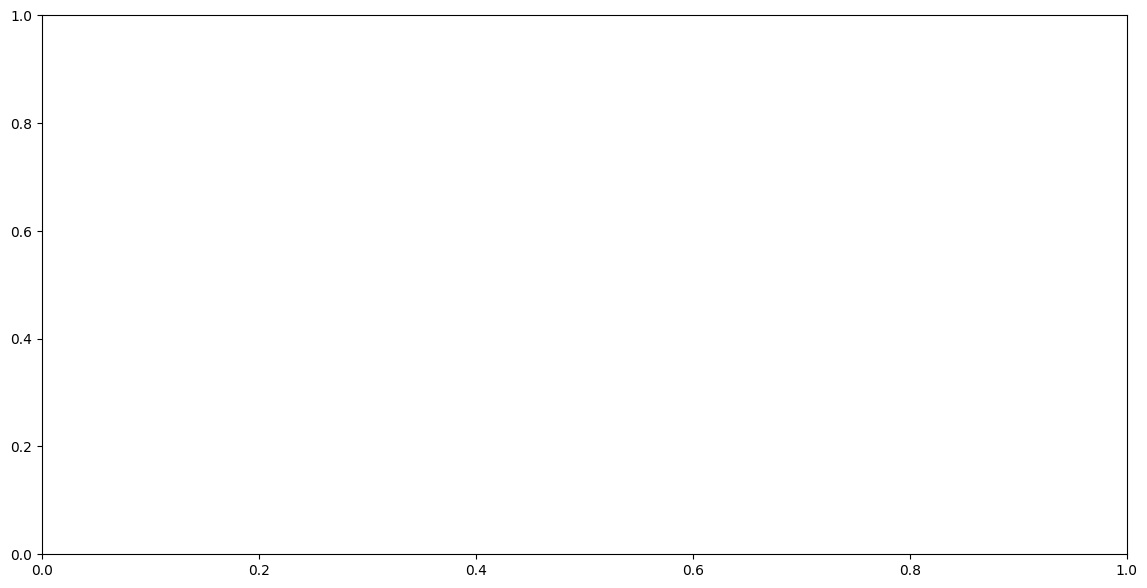

In [154]:
plt.figure(figsize=(14,7))
ax = plt.subplot(111)

models = ['Logistic Regression', 'Decision Tree', 'Random Forests']
x = np.arange(len(models))  # positions

# Bar widths
width = 0.25  

# Accuracy
ax.bar(x - width, [accuracy_logit, accuracy_dtree, accuracy_rm], 
       width=width, alpha=0.7, color='red', label='Accuracy')

# Precision
ax.bar(x, [precision_logit, precision_dtree, precision_rm], 
       width=width, alpha=0.7, color='blue', label='Precision')

# Recall
ax.bar(x + width, [recall_logit, recall_dtree, recall_rm], 
       width=width, alpha=0.7, color='green', label='Recall')

# X-axis ticks
ax.set_xticks(x)
ax.set_xticklabels(models)

# Labels and Title
ax.set_ylabel('Score')
ax.set_title('Performance Metrics for Different Models')

# Style
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.legend()

plt.show()


NameError: name 'accuracy_logit' is not defined

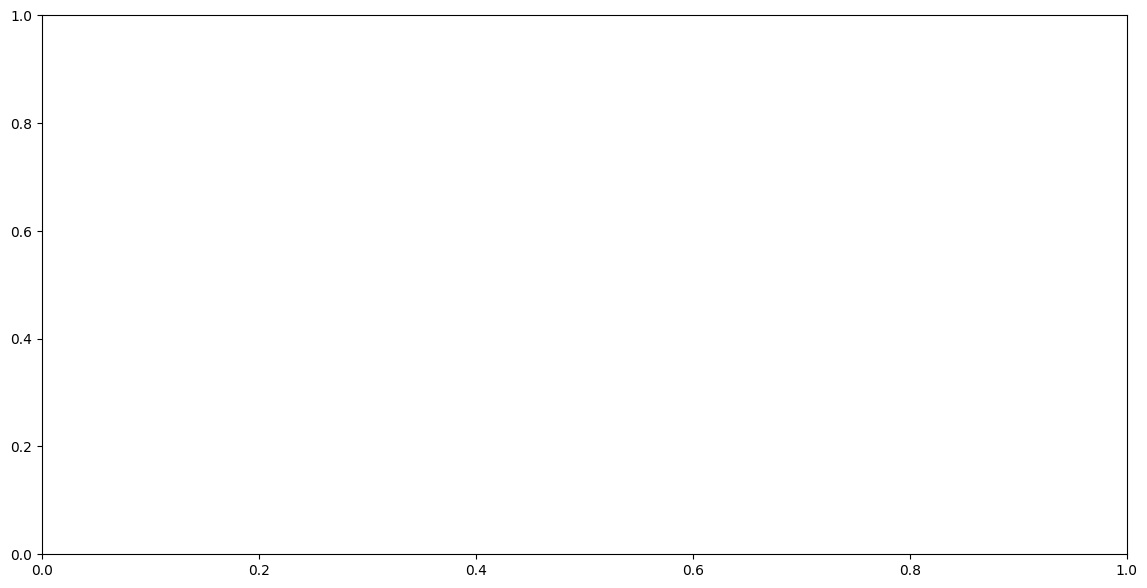

In [121]:
plt.figure(figsize=(14,7))
ax=plt.subplot(111)

models = ['Logistic Regression', 'Decision Tree', 'Random Forests']
values = [accuracy_logit, accuracy_dtree, accuracy_rm]
model = np.arange(len(models))

plt.bar(model, values, align='center', width=0.15, alpha=0.7, color='red', label='accuracy')
plt.xticks(model, models)

ax = plt.subplot(111)
models = ['Logistic Regression', 'Decision Tree', 'Random Forests']
values = [precision_logit, precision_dtree, precision_rm]
model = np.arange(len(models))

plt.bar(model + 0.15, values, align='center', width=0.15, alpha=0.7, color='blue', label='precision')
plt.xticks(model, models)

ax = plt.subplot(111)
models = ['Logistic Regression', 'Decision Tree', 'Random Forests']
values = [recall_logit, recall_dtree, recall_rm]
model = np.arange(len(models))

plt.bar(model + 0.3, values, align='center', width=0.15, alpha=0.7, color='green', label='recall')
plt.xticks(model, models)

plt.ylabel('Performance Metrics for Different models')
plt.title('Model')

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

ax.legend()

plt.show()


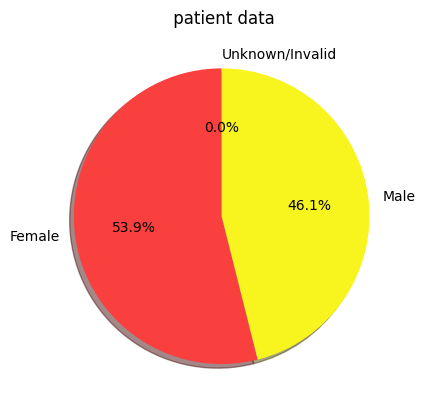

In [159]:
plt.title(' patient data')
plt.pie(df['gender'].value_counts(normalize = True),labels = df['gender'].value_counts().index,startangle = 90,shadow = True,autopct = '%1.1f%%',colors =["#FA3F3F","#F8F41D","#EC9D0A","#FA3F87","#3FFAE1","#FFABAB"])
plt.show()


{'whiskers': [<matplotlib.lines.Line2D at 0x1fa2675e610>,
 'caps': [<matplotlib.lines.Line2D at 0x1fa2675c410>,
 'boxes': [<matplotlib.lines.Line2D at 0x1fa264d1050>],
 'medians': [<matplotlib.lines.Line2D at 0x1fa26763a50>],
 'fliers': [<matplotlib.lines.Line2D at 0x1fa267546d0>],
 'means': []}

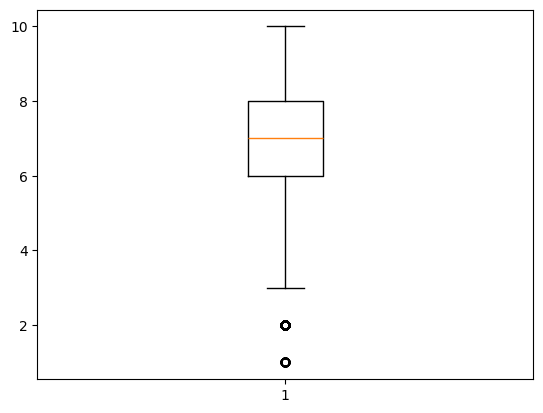

In [162]:
plt.boxplot(df['age'])  

(array([44022., 19740.,     0., 12131.,     0.,  9018.,  3971.,     0.,
         2891.,  4674.]),
 array([0. , 0.6, 1.2, 1.8, 2.4, 3. , 3.6, 4.2, 4.8, 5.4, 6. ]),
 <BarContainer object of 10 artists>)

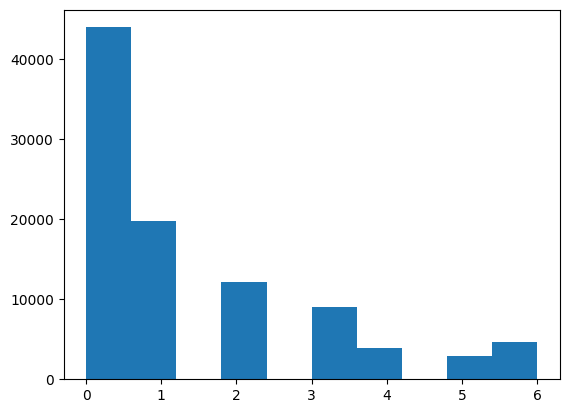

In [164]:
plt.hist(df['num_procedures'])